## TASK 4: “Netflix Titles Dataset – Exploratory Analysis & Insights”

#### 1. Data Understanding & Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("netflix_titles.csv")
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB
None
    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transform

In [4]:
df["release_decade"] = (df["release_year"] // 10) * 10
df["is_movie"] = df["type"].apply(lambda x: 1 if x == "Movie" else 0)


#### 2. Feature Engineer

In [6]:
df["added_year"] = df["date_added"].dt.year

df["content_type"] = df["type"]

top_countries = (
    df["country"]
    .str.split(", ")
    .explode()
    .value_counts()
    .head(5)
    .index
)

df["top_country"] = df["country"].apply(
    lambda x: x if x in top_countries else "Other"
)


#### 3. Visualization & Insights

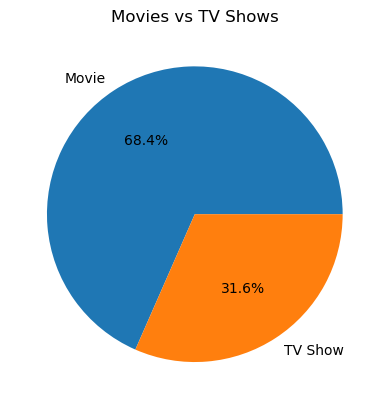

In [7]:
df["type"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    title="Movies vs TV Shows"
)
plt.ylabel("")
plt.show()


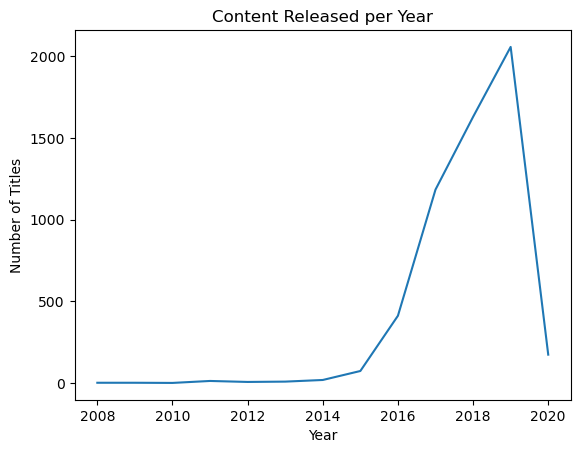

In [8]:
df.groupby("added_year").size().plot(kind="line")
plt.title("Content Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


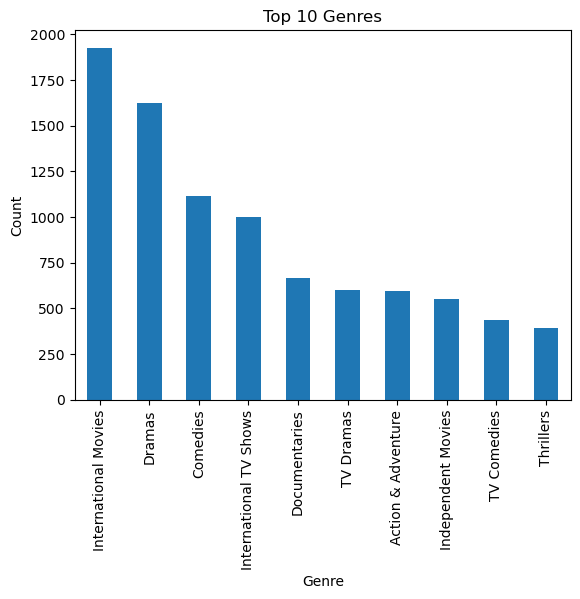

In [9]:
top_genres = (
    df["listed_in"]
    .str.split(", ")
    .explode()
    .value_counts()
    .head(10)
)

top_genres.plot(kind="bar")
plt.title("Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


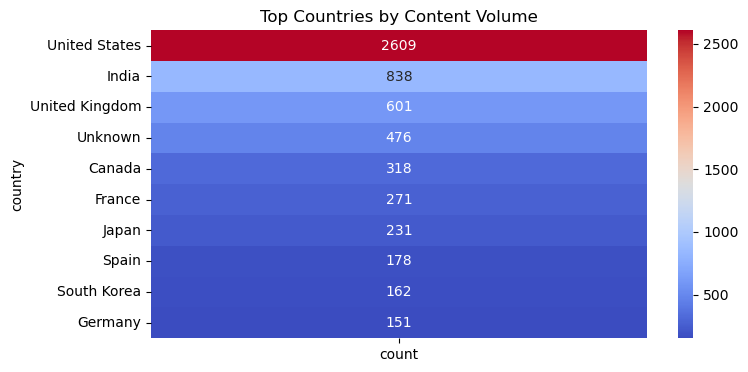

In [10]:
country_content = (
    df["country"]
    .str.split(", ")
    .explode()
    .value_counts()
    .head(10)
)

plt.figure(figsize=(8, 4))
sns.heatmap(
    country_content.to_frame(),
    annot=True,
    fmt="d",
    cmap="coolwarm"
)
plt.title("Top Countries by Content Volume")
plt.show()


#### 4. Bonus & Trend Prediction (Next 2 Year)

In [11]:
from sklearn.linear_model import LinearRegression

yearly = df.groupby("added_year").size().reset_index(name="count")
yearly.dropna(inplace=True)

X = yearly[["added_year"]]
y = yearly["count"]

model = LinearRegression()
model.fit(X, y)

future_years = pd.DataFrame({"added_year": [X["added_year"].max()+1,
                                             X["added_year"].max()+2]})

predictions = model.predict(future_years)

print("Predicted content releases:")
print(pd.concat([future_years, pd.Series(predictions, name="predicted_count")], axis=1))


Predicted content releases:
   added_year  predicted_count
0      2021.0      1283.576923
1      2022.0      1405.593407


## Deliverables: 
✔ Python Notebook

Data cleaning

Feature engineering

Visualizations

Trend prediction

✔ 5–6 Visuals

Pie chart (Movie vs TV)

Line plot (Yearly releases)

Bar plot (Top genres)

Heatmap (Country vs content)

(Optional) Trend line